In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split


In [9]:
kyf_enriched = pd.read_excel('kyf_enriched.xls', encoding='xlrd', parse_dates=['Year'], \
                             converters={'state_fips':str,'county_fips':str})
kyf_enriched.head(1)

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,block_group,county,county_fips,district_number,house_district_name,house_district_number,place_fips,senate_district_name,senate_district_number,state_fips
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,1.0,Anchorage Municipality,02020,0.0,State House District 20,20,203000.0,State Senate District J,J,02


In [ ]:
ky

In [11]:
urban_rural = pd.read_excel('ruralurbancodes2013.xls', converters={'FIPS': str}, encoding='xlrd')
urban_rural.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,01001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,01003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,01005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,01007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,01009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...


In [12]:
kyf_enr_urban_rural = pd.merge(kyf_enriched, rural_urban, left_on='county_fips', right_on='FIPS')
kyf_enr_urban_rural.head()

,Title,Name,Abbreviati,Year,Address,State_x,Town,Zip,Agency,Mission_Ar,...,place_fips,senate_district_name,senate_district_number,state_fips,FIPS,State_y,County_Name,Population_2010,RUCC_2013,Description_y
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,203000.0,State Senate District J,J,02,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,203000.0,State Senate District J,J,02,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
2,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2011-01-01,"99508, Anchorage, AK",AK,Anchorage,99508,RBCS,Rural Development,...,203000.0,State Senate District J,J,02,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
3,Bright Beginnings,CACFP Wellness Grants,CACFP,2012-01-01,1000 Sundown Court,AK,Anchorage,99515,FNS,"Food, Nutrition and Consumer Services",...,203000.0,State Senate District M,M,02,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
4,ChefDays Farmers Market Project,Specialty Crop Block Grants,SCBG,2012-01-01,"99501, Anchorage, AK",AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,203000.0,State Senate District J,J,02,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."


In [19]:
kyf_enr_urban_rural['rural'] = kyf_enr_urban_rural['RUCC_2013'].apply(lambda x: 1.0 if x >= 7 else 0.)

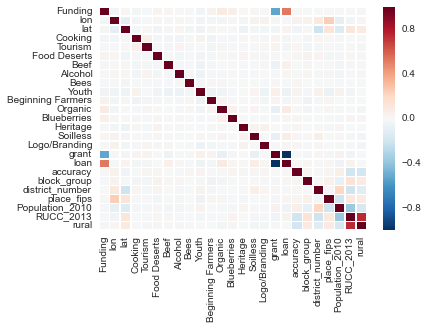

In [22]:
corr = kyf_enr_urban_rural.corr()
sns.heatmap(corr, linewidths= 0.25)

flag for majority white, majority black, under 50% majority minority

In [35]:
median_inc=pd.read_clipboard()
%store median_inc

Stored 'median_inc' (DataFrame)


In [42]:
print len(median_inc)
median_inc.head()

3142


,cty_fips,Geography,num_households,median_income
0,1001,"Autauga County, Alabama",20304,52475
1,1003,"Baldwin County, Alabama",73058,50183
2,1005,"Barbour County, Alabama",9145,35634
3,1007,"Bibb County, Alabama",7078,37984
4,1009,"Blount County, Alabama",20934,44409


In [44]:
county_race = pd.read_clipboard()
# %store county_race
print len(county_race)
county_race.head()

2833


,Id2,Geography,pop_total,pop_pct_white,pop_pct_afam
0,1001,"Autauga County, Alabama",55263.0,77.4,18.7
1,1003,"Baldwin County, Alabama",190981.0,86.4,9.6
2,1005,"Barbour County, Alabama",27203.0,47.4,46.8
3,1007,"Bibb County, Alabama",22648.0,76.7,21.4
4,1009,"Blount County, Alabama",57807.0,95.1,1.5


In [45]:
demographics = pd.merge(left=median_inc, right=county_race, left_on='cty_fips', right_on='Id2', how='left',right_index=False)


In [50]:
demographics.head()

,cty_fips,Geography_x,num_households,median_income,Id2,Geography_y,pop_total,pop_pct_white,pop_pct_afam
0,1001,"Autauga County, Alabama",20304,52475,1001.0,"Autauga County, Alabama",55263.0,77.4,18.7
1,1003,"Baldwin County, Alabama",73058,50183,1003.0,"Baldwin County, Alabama",190981.0,86.4,9.6
2,1005,"Barbour County, Alabama",9145,35634,1005.0,"Barbour County, Alabama",27203.0,47.4,46.8
3,1007,"Bibb County, Alabama",7078,37984,1007.0,"Bibb County, Alabama",22648.0,76.7,21.4
4,1009,"Blount County, Alabama",20934,44409,1009.0,"Blount County, Alabama",57807.0,95.1,1.5


In [48]:
acs_13_3yr = pd.read_csv('ACS_13_3YR_S0201.csv')
acs_13_3yr

,GEO.id,GEO.id2,GEO.display-label,POPGROUP.id,POPGROUP.display-label,EST_VC03,MOE_VC03,EST_VC04,MOE_VC04,EST_VC05,...,EST_VC456,MOE_VC456,EST_VC457,MOE_VC457,EST_VC461,MOE_VC461,EST_VC462,MOE_VC462,EST_VC463,MOE_VC463
0,Id,Id2,Geography,Id,Population Group,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,Margin of Error; TOTAL NUMBER OF RACES REPORTE...,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,Margin of Error; TOTAL NUMBER OF RACES REPORTE...,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,...,Estimate; GROSS RENT - Occupied units paying rent,Margin of Error; GROSS RENT - Occupied units p...,Estimate; GROSS RENT - Occupied units paying r...,Margin of Error; GROSS RENT - Occupied units p...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...
1,0500000US01073,01073,"Jefferson County, Alabama",001,Total population,658601,NaN,99.0,0.2,1.0,...,86927,2312,793,13,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01073,01073,"Jefferson County, Alabama",002,White alone,348342,1688,100.0,0.1,NaN,...,32527,1472,877,19,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01073,01073,"Jefferson County, Alabama",004,Black or African American alone,279024,893,100.0,0.1,NaN,...,50081,1678,733,13,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US04013,04013,"Maricopa County, Arizona",001,Total population,3939668,NaN,97.1,0.1,2.7,...,534725,6429,934,6,NaN,NaN,NaN,NaN,NaN,NaN
5,0500000US04013,04013,"Maricopa County, Arizona",002,White alone,3174535,9371,100.0,0.1,NaN,...,411688,5370,956,7,NaN,NaN,NaN,NaN,NaN,NaN
6,0500000US04013,04013,"Maricopa County, Arizona",004,Black or African American alone,204844,2840,100.0,0.1,NaN,...,48615,1884,871,15,NaN,NaN,NaN,NaN,NaN,NaN
7,0500000US04013,04013,"Maricopa County, Arizona",006,"American Indian and Alaska Native alone (300, ...",74427,2770,100.0,0.1,NaN,...,12382,1197,817,30,NaN,NaN,NaN,NaN,NaN,NaN
8,0500000US04013,04013,"Maricopa County, Arizona",012,Asian alone (400-499),142897,2388,100.0,0.1,NaN,...,18586,1333,965,27,NaN,NaN,NaN,NaN,NaN,NaN
9,0500000US04013,04013,"Maricopa County, Arizona",070,Some other race alone,221509,8582,100.0,0.1,NaN,...,30336,1471,833,19,NaN,NaN,NaN,NaN,NaN,NaN
